# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
#url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send the API request
        city_response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = city_response.json()
            
        # Check if essential data fields exist in the JSON response
        city_name = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
                
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp(C)": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    except Exception as e:
        print(f"City not found {city}: {e}. Skipping.")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | zemio
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | luau
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | pratt
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | eyl
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | palikir - national government center
Processing Record 22 of Set 1 | edinburgh of th

Processing Record 35 of Set 4 | bodo
Processing Record 36 of Set 4 | payshamba shahri
An error occurred while processing payshamba shahri: 'name'. Skipping.
Processing Record 37 of Set 4 | granbury
Processing Record 38 of Set 4 | mocorito
Processing Record 39 of Set 4 | vingt cinq
An error occurred while processing vingt cinq: 'name'. Skipping.
Processing Record 40 of Set 4 | mil'kovo
Processing Record 41 of Set 4 | kenai
Processing Record 42 of Set 4 | constantia
Processing Record 43 of Set 4 | turabah
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | gorontalo
Processing Record 46 of Set 4 | hirara
Processing Record 47 of Set 4 | kalabo
Processing Record 48 of Set 4 | benguela
Processing Record 49 of Set 4 | siracusa
Processing Record 0 of Set 5 | petropavlovsk-kamchatsky
Processing Record 1 of Set 5 | mogadishu
Processing Record 2 of Set 5 | ciranjang-hilir
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set

Processing Record 17 of Set 8 | ati
Processing Record 18 of Set 8 | ciudad lazaro cardenas
Processing Record 19 of Set 8 | kataragama
An error occurred while processing kataragama: 'name'. Skipping.
Processing Record 20 of Set 8 | katabu
Processing Record 21 of Set 8 | angaur state
Processing Record 22 of Set 8 | pesqueira
Processing Record 23 of Set 8 | gamay
Processing Record 24 of Set 8 | trzemeszno
Processing Record 25 of Set 8 | ad-damazin
Processing Record 26 of Set 8 | ak-dovurak
Processing Record 27 of Set 8 | yagry
An error occurred while processing yagry: 'name'. Skipping.
Processing Record 28 of Set 8 | maulavi bazar
Processing Record 29 of Set 8 | tabou
Processing Record 30 of Set 8 | collie
Processing Record 31 of Set 8 | gokcebey
Processing Record 32 of Set 8 | lac-brome
Processing Record 33 of Set 8 | tanguieta
Processing Record 34 of Set 8 | ingeniero jacobacci
Processing Record 35 of Set 8 | bhamo
Processing Record 36 of Set 8 | cassilandia
Processing Record 37 of Set 

Processing Record 44 of Set 11 | izluchinsk
Processing Record 45 of Set 11 | antalaha
Processing Record 46 of Set 11 | yoloten
Processing Record 47 of Set 11 | yangor
An error occurred while processing yangor: 'name'. Skipping.
Processing Record 48 of Set 11 | ende
Processing Record 49 of Set 11 | ixtapa
Processing Record 0 of Set 12 | kiunga
Processing Record 1 of Set 12 | vilyuchinsk
Processing Record 2 of Set 12 | beira
Processing Record 3 of Set 12 | howard springs
Processing Record 4 of Set 12 | puerto princesa
Processing Record 5 of Set 12 | amos
Processing Record 6 of Set 12 | cambria
Processing Record 7 of Set 12 | taulaga
Processing Record 8 of Set 12 | pundong
Processing Record 9 of Set 12 | steamboat springs
Processing Record 10 of Set 12 | taltal
Processing Record 11 of Set 12 | ranot
Processing Record 12 of Set 12 | labasa
Processing Record 13 of Set 12 | warmbad
Processing Record 14 of Set 12 | isaccea
Processing Record 15 of Set 12 | darasun
Processing Record 16 of Set 1

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [88]:
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adamstown,-25.0660,-130.1015,17.63,82,100,14.58,PN,1694791186
1,West Island,-12.1568,96.8225,25.99,73,75,6.17,CC,1694791190
2,Saint-François,46.4154,3.9054,28.69,39,0,2.57,FR,1694791721
3,Port-aux-Français,-49.3500,70.2167,4.64,91,97,15.70,TF,1694791194
4,Zemio,5.0314,25.1361,29.71,61,97,1.52,CF,1694791721


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,17.63,82,100,14.58,PN,1694791186
1,West Island,-12.1568,96.8225,25.99,73,75,6.17,CC,1694791190
2,Saint-François,46.4154,3.9054,28.69,39,0,2.57,FR,1694791721
3,Port-aux-Français,-49.3500,70.2167,4.64,91,97,15.70,TF,1694791194
4,Zemio,5.0314,25.1361,29.71,61,97,1.52,CF,1694791721


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

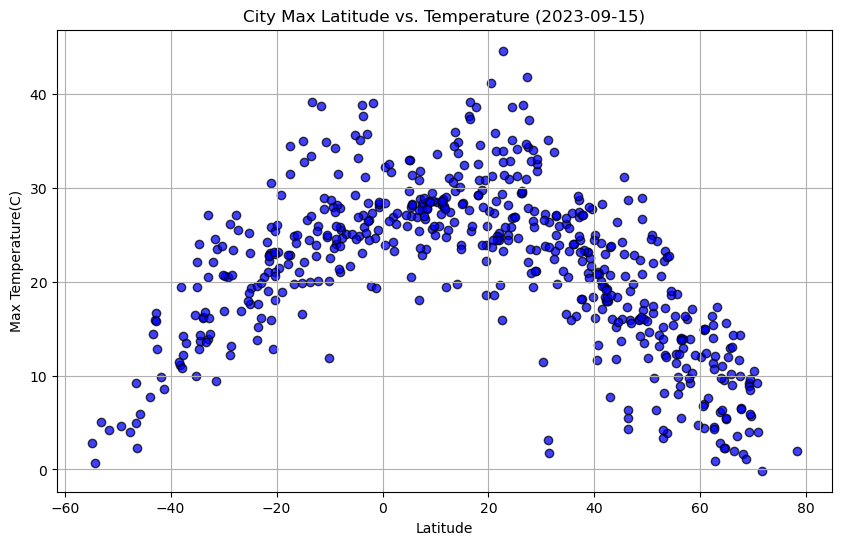

In [91]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], facecolors='blue', edgecolors='black', alpha=0.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature(C) (2023-09-15)')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

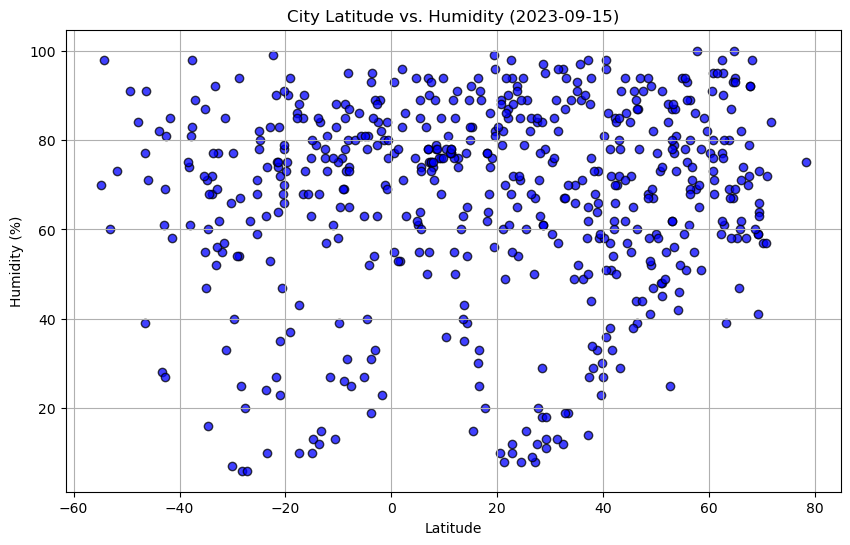

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], facecolors='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%) (2023-09-15)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

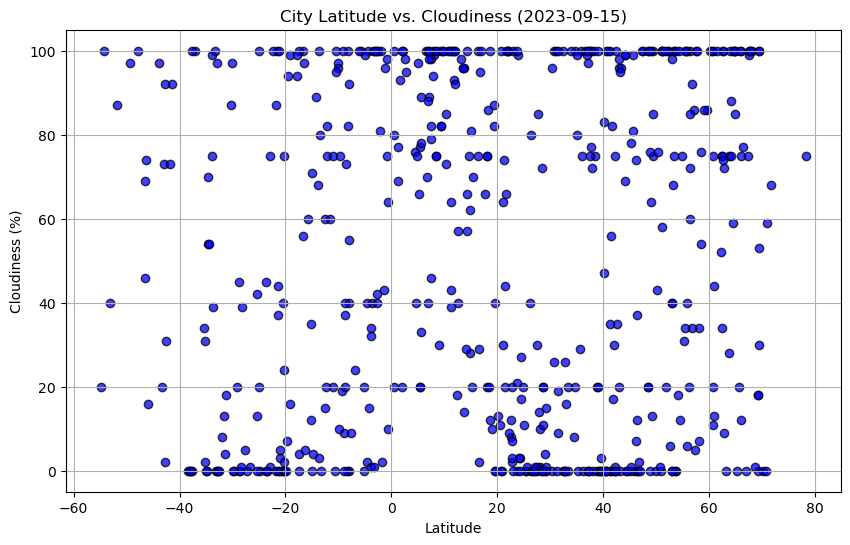

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], facecolors='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%) (2023-09-15)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

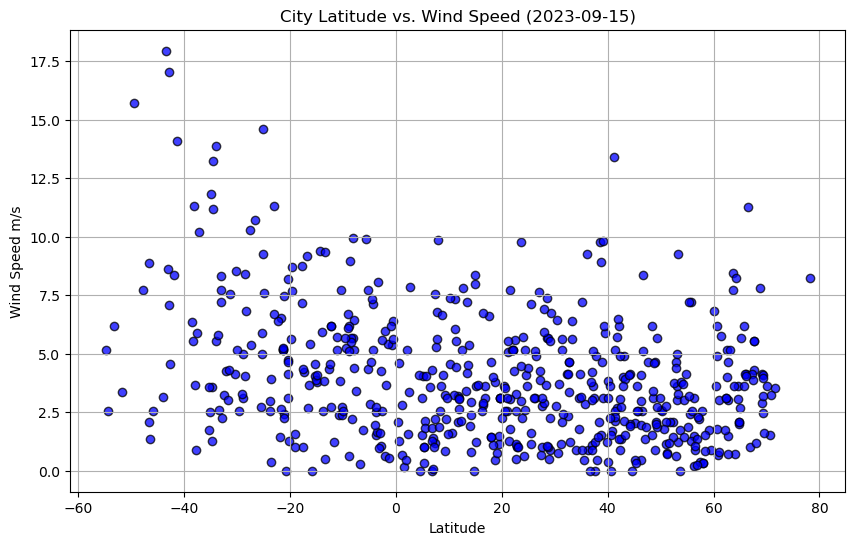

In [94]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], facecolors='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (m/s) (2023-09-15)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
def linear_regression (x_value, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
     # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', color='blue')

    # Add the regression line
    plt.plot(x_values, regress_values, color='red')

    # Add equation of the line to the plot
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add legend
    plt.legend()
    
    # R-value
    print(f"The r-squared is: {rvalue**2}")

    # Show the scatter plot
    plt.show()

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
        
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Saint-François,46.4154,3.9054,28.69,39,0,2.57,FR,1694791721
4,Zemio,5.0314,25.1361,29.71,61,97,1.52,CF,1694791721
5,Utrik,11.2278,169.8474,28.48,78,100,7.32,MH,1694791207
11,Iqaluit,63.7506,-68.5145,2.85,69,75,7.72,CA,1694791109
14,Yellowknife,62.4560,-114.3525,11.34,98,75,5.14,CA,1694791206


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,17.63,82,100,14.58,PN,1694791186
1,West Island,-12.1568,96.8225,25.99,73,75,6.17,CC,1694791190
3,Port-aux-Français,-49.3500,70.2167,4.64,91,97,15.70,TF,1694791194
6,Uturoa,-16.7333,-151.4333,24.90,85,100,9.16,PF,1694791194
7,Bredasdorp,-34.5322,20.0403,13.73,60,54,11.19,ZA,1694791192


###  Temperature vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.6006240878271587


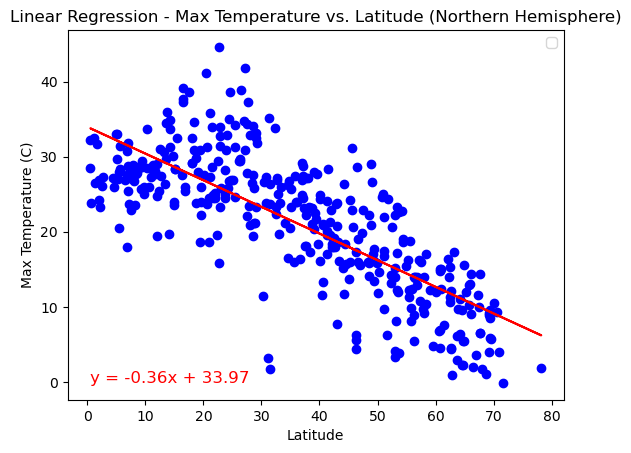

In [105]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define labels and title
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
title = 'Linear Regression - Max Temperature (C)vs. Latitude (Northern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.5979185980830969


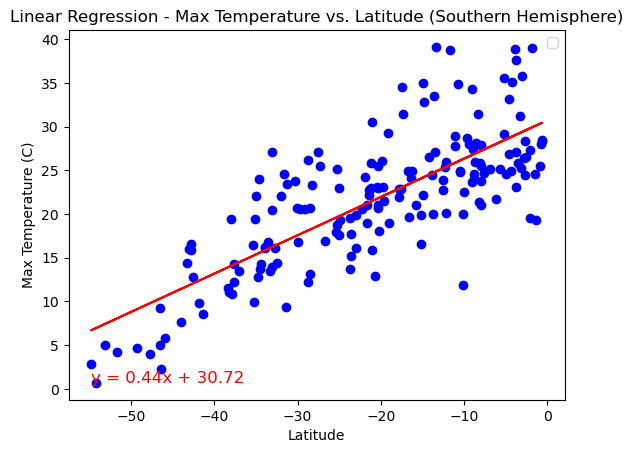

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define labels and title
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
title = 'Linear Regression - Max Temperature (C) vs. Latitude (Southern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** There is a strong corellation between latitude and max temperature as seen by the linear regressions and supported by the r-values. 

In the Northern Hemisphere, there is a strong negative linear relationship (r-value = 0.6006240878271587) between latitude and maximum temperature meaning the further you are from the equator the lower the max temperature. 

In the Southern Hemisphere, there is a strong positive linear relationship (r-value = 0.5979185980830969) between latitude and maximum temperature meaning the closer you are to the equator the higher the max temperature.

In the Northern hemisphere for every degree increase in latitude from the equator the max temp will decrease by 0.36(C). 

In the Southern hemisphere for every degree decrease in latitude from the equator the max temp will increase by 0.44(C).


### Humidity vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.00046795325089073154


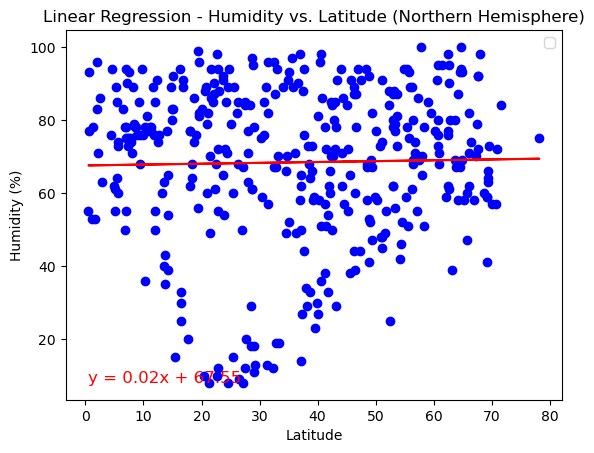

In [107]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define labels and title
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Linear Regression - Humidity (%) vs. Latitude (Northern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 1.36471493629855e-05


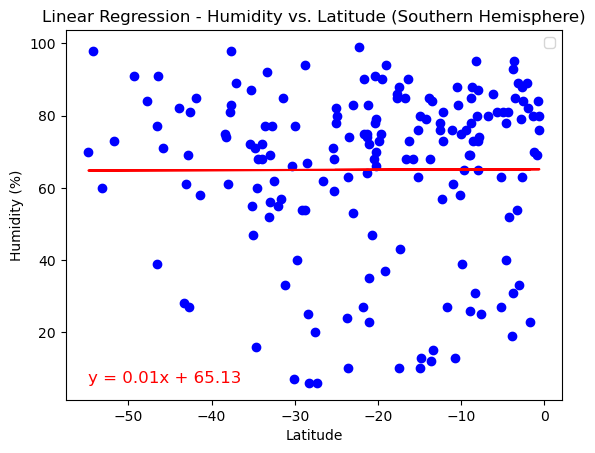

In [108]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define labels and title
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Linear Regression - Humidity (%) vs. Latitude (Southern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** 
There is only a minimal linear correlation between humidity and latitude in the Northern Hemisphere. The low R-squared value of 0.000468 reaffirms that humidity levels in the Northern Hemisphere are poorly predicted by latitude alone

There is no significant linear correlation between humidity and latitude in the Southern Hemisphere. The low R-squared value of 1.36e-05 reaffirms that humidity levels in the Southern Hemisphere are poorly predicted by latitude.

### Cloudiness vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.0019188650418044731


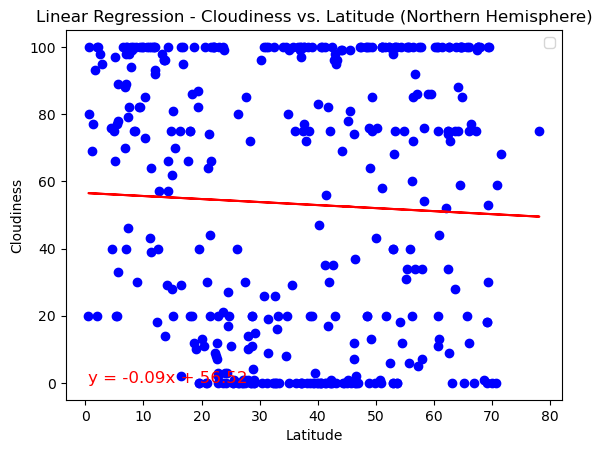

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define labels and title
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Linear Regression - Cloudiness (%) vs. Latitude (Northern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.007253293213201416


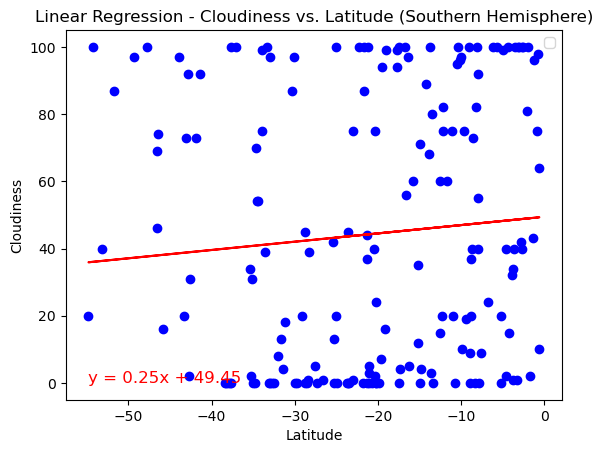

In [111]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define labels and title
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Linear Regression - Cloudiness (%) vs. Latitude (Southern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** For the Northern Hemisphere, the R-squared value is approximately 0.0019. This suggests that there is a very weak linear correlation between cloudiness and latitude in the Northern Hemisphere.

In the Southern Hemisphere, the R-squared value is slightly higher at approximately 0.0073. This indicates a slightly stronger, but still relatively weak, linear correlation between cloudiness and latitude in the Southern Hemisphere. 

There may be some subtle linear trends between cloudiness and latitude in both hemispheres, these relationships are not strong.

### Wind Speed vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 1.8405822075660316e-05


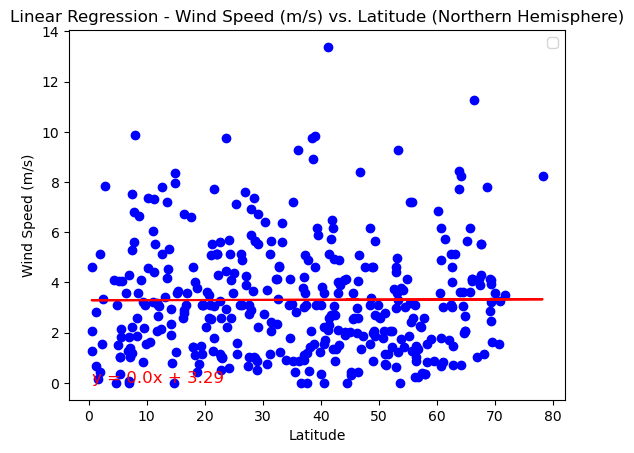

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define labels and title
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
title = 'Linear Regression - Wind Speed (m/s) vs. Latitude (Northern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared is: 0.07328492619204047


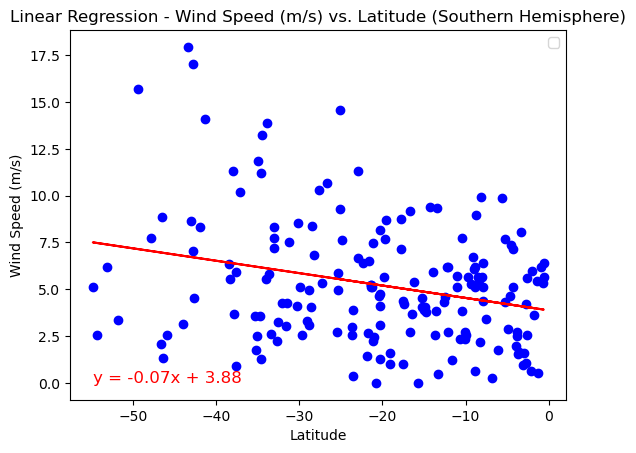

In [113]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define labels and title
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
title = 'Linear Regression - Wind Speed (m/s) vs. Latitude (Southern Hemisphere)'

# Use linear_regression function
linear_regression(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** 
For the Northern Hemisphere, the R-squared value is approximately 0.0000184. This indicates a very weak linear correlation between wind speed and latitude in the Northern Hemisphere.

In the Southern Hemisphere, the R-squared value is higher at approximately 0.0733. This suggests a slightly stronger linear correlation between wind speed and latitude in the Southern Hemisphere compared to the Northern Hemisphere. However, it is still a relatively weak correlation. 

Overall, there may be some very weak linear relationships between wind speed and latitude in both hemispheres, these correlations are not strong.